# Linear Models

## Linear Regression

A linear model makes a prediction by simply computing a weighted sum of the input features, plus a constant called the bias term (also called the intercept term).
<!-- Put linear regression model prediction equation below -->
$$\hat{y} = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n$$

In this equation:
- $\hat{y}$ is the predicted value.
- $n$ is the number of features.
- $x_i$ is the $i^{th}$ feature value.
- $\theta_j$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$).

The vectorized form of the equation is:
$$\hat{y} = h_\theta(\mathbf{x}) = \theta^T\cdot\mathbf{x}$$

In this equation:
- $\mathbf{x}$ is the instance's feature vector, containing $x_0$ to $x_n$, with $x_0$ always equal to 1.
- $\theta$ is the model's parameter vector, containing $\theta_0$ to $\theta_n$, with $\theta_0$ always equal to 0.
- $\theta^T$ is the transpose of $\theta$.
- $\theta^T\cdot\mathbf{x}$ is the dot product of $\theta^T$ and $\mathbf{x}$.
- $h_\theta$ is the hypothesis function, using the model parameters $\theta$.

### The Normal Equation

To find the value of $\theta$ that minimizes the cost function, there is a closed-form solution in which the result is a simple mathematical equation. This is called the Normal Equation.
<!-- Put Normal Equation below -->
$$\hat{\theta} = (\mathbf{X}^T\cdot\mathbf{X})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$$

In this equation:
- $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function.
- $\mathbf{y}$ is the vector of target values containing $y_1$ to $y_m$.

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

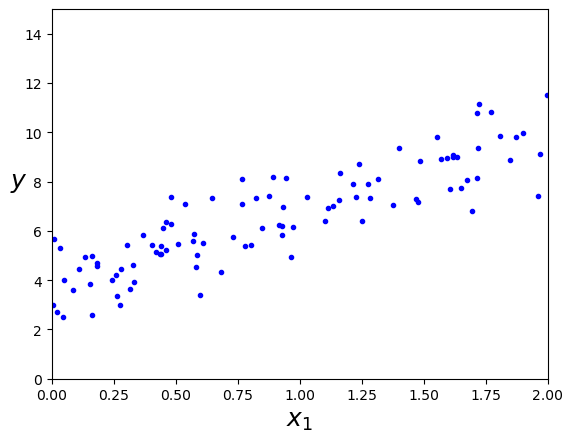

In [2]:
import matplotlib.pyplot as plt
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
# Computer the closed-form solution/normal equation
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
theta_best

array([[3.7874729 ],
       [3.08786134]])

In [5]:
# Make predictions using theta_best
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.7874729 ],
       [9.96319558]])

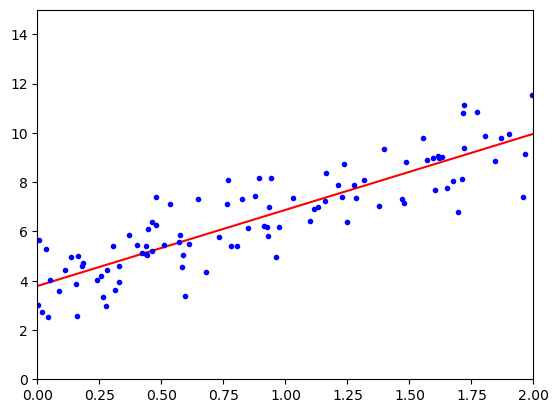

In [6]:
# Plot the model's predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

#### Using Scikit-Learn

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.7874729]), array([[3.08786134]]))

In [8]:
lin_reg.predict(X_new)

array([[3.7874729 ],
       [9.96319558]])

In [9]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.7874729 ],
       [3.08786134]])

This function computes $\hat{\theta} = \mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^+$ is the pseudoinverse of $\mathbf{X}$, which is computed using a matrix factorization technique called Singular Value Decomposition (SVD).

```python 

In [10]:
np.linalg.pinv(X_b).dot(y)

array([[3.7874729 ],
       [3.08786134]])

The pseudoinverse itself is computed using the `pinv()` function from NumPy's Linear Algebra module (`np.linalg`), and the `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (which you could call directly).

The pseudoinverse is computed as:
$$\mathbf{X}^+ = \mathbf{V}\cdot\mathbf{\Sigma}^+\cdot\mathbf{U}^T$$

### Computational Complexity

The Normal Equation computes the inverse of $\mathbf{X}^T\cdot\mathbf{X}$, which is an $n\times n$ matrix (where $n$ is the number of features). The computational complexity of inverting such a matrix is typically about $O(n^2.4)$ to $O(n^3)$, depending on the implementation. In other words, if you double the number of features, you multiply the computation time by roughly $2^2.4 \approx 5.3$.

### Gradient Descent

Gradient Descent is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

#### Batch Gradient Descent

To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. This is called a partial derivative. The gradient vector containing all the partial derivatives is called the gradient vector.

The partial derivative of the MSE cost function with regards to $\theta_j$ is:
$$\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^m(\theta^T\cdot\mathbf{x}^{(i)} - y^{(i)})x_j^{(i)}$$

The gradient vector of the cost function is:
$$\nabla_\theta MSE(\theta) = \begin{pmatrix}\frac{\partial}{\partial\theta_0}MSE(\theta) \\ \frac{\partial}{\partial\theta_1}MSE(\theta) \\ \vdots \\ \frac{\partial}{\partial\theta_n}MSE(\theta) \end{pmatrix} = \frac{2}{m}\mathbf{X}^T\cdot(\mathbf{X}\cdot\theta - \mathbf{y})$$

Gradient descent step:
$$\theta^{(\text{next step})} = \theta - \eta\nabla_\theta MSE(\theta)$$

In [11]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [12]:
theta

array([[3.7874729 ],
       [3.08786134]])

In [13]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

#### Stoachastic Gradient Descent

Stochastic Gradient Descent is the extreme opposite of Batch Gradient Descent. Instead of computing the gradients based on the full training set at every step, it computes the gradients based on just one instance. When the training set is large, this makes it possible to train the model very quickly, but it also makes it much harder for the algorithm to escape from local minima.

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

In [15]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

By convention, we iterate by rounds of $m$ iterations; each round is called an *epoch*. The steps of Stochastic Gradient Descent are:
1. Shuffle the training set.
2. For each instance in the training set:
    1. Compute the gradients based only on that single instance.
    2. Update the model parameters using the gradients.
3. Repeat the previous two steps until the number of epochs is reached, or until the algorithm converges to a minimum.

In [16]:
theta

array([[3.79807402],
       [3.06723407]])

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.81218128]), array([3.12421693]))

#### Mini-batch Gradient Descent

Mini-batch Gradient Descent computes the gradients on small random sets of instances called mini-batches. The main advantage of Mini-batch Gradient Descent over Stochastic Gradient Descent is that you can get a performance boost from hardware optimization of matrix operations, especially when using GPUs.

In [19]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [20]:
theta

array([[3.81147608],
       [3.1323392 ]])

### Polynomial Regression

Polynomial Regression is a special case of Linear Regression where the predictors are transformed by raising them to a power. For example, if your data is linear, then a quadratic model will fit it better than a linear model. This is because a quadratic model can fit curvy data.

In [21]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

In [22]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

In [23]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [24]:
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78437842]), array([[ 1.02570217,  0.56304305, -0.01702965]]))

#### Learning Curves

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train) + 1):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

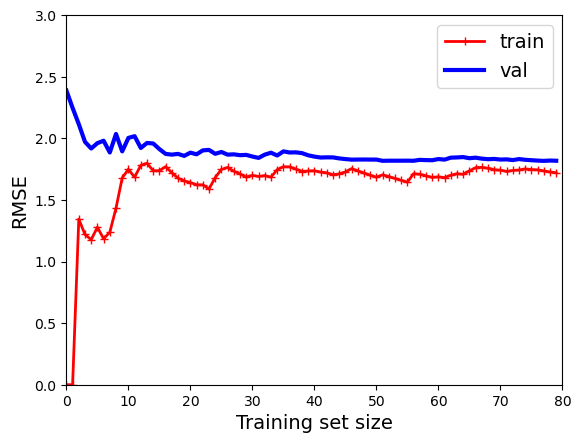

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()                                      # not shown

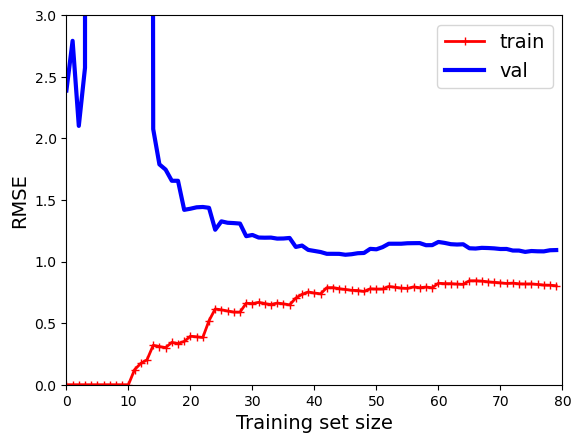

In [28]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

#### The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:
$$\text{Generalization Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

- Bias: This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.
- Variance: This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data.
- Irreducible error: This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

### Regularized Linear Models

For a linear model, regularization is typically achieved by constraining the weights of the model. We will now look at Ridge Regression, Lasso Regression, and Elastic Net, which implement three different ways to constrain the weights.

#### Ridge Regression

It is a regularized version of Linear Regression: a regularization term equal to $\alpha\sum_{i=1}^n\theta_i^2$ is added to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. Note that the regularization term should only be added to the cost function during training. Once the model is trained, you want to evaluate the model's performance using the unregularized performance measure.

The hyperparameter $\alpha$ controls how much you want to regularize the model. If $\alpha = 0$ then Ridge Regression is just Linear Regression. If $\alpha$ is very large, then all weights end up very close to zero and the result is a flat line going through the data's mean.

The Ridge cost function is:

$$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha\frac{1}{2}\sum_{i=1}^n \theta_i^2$$

where $\alpha$ is the regularization hyperparameter, and $n$ is the number of features.

If we define $\mathbf{w}$ as a vector containing all the feature weights except the bias term $\theta_0$, then the regularization term is equal to $\frac{1}{2}(\lVert\mathbf{w}\rVert_2)^2$, where $\lVert\mathbf{w}\rVert_2$ is the $\ell_2$ norm of the weight vector. This is simply a squared $\ell_2$ norm.

Ridge Regression closed-form solution:
$$\hat{\mathbf{\theta}} = (\mathbf{X}^T\cdot\mathbf{X} + \alpha\mathbf{A})^{-1}\cdot\mathbf{X}^T\cdot\mathbf{y}$$

where $\mathbf{A}$ is an $n+1\times n+1$ identity matrix except with a zero in the top-left cell, corresponding to the bias term $\theta_0$.

In [30]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [31]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [32]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

#### Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression (simply called Lasso Regression) is another regularized version of Linear Regression: just like Ridge Regression, it adds a regularization term to the cost function, but it uses the $\ell_1$ norm of the weight vector instead of half the square of the $\ell_2$ norm.

Lasso Regression cost function:
$$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha\sum_{i=1}^n |\theta_i|$$

Lasso tends to completely eliminate the weights of the least important features (i.e., set them to zero). In other words, Lasso Regression automatically performs feature selection and outputs a sparse model (i.e., with few nonzero feature weights).

The Lasso cost function is not differentiable at $\theta_i = 0$ (for $i = 1, 2, \dots, n$), but Gradient Descent still works fine if you use a subgradient vector g instead when any $\theta_i = 0$.

Lasso Regression subgradient vector:
$$g(\mathbf{\theta}, J) = \nabla_\theta MSE(\mathbf{\theta}) + \alpha\begin{pmatrix} \text{sign}(\theta_1) \\ \text{sign}(\theta_2) \\ \vdots \\ \text{sign}(\theta_n) \end{pmatrix} = \frac{2}{m}\mathbf{X}^T\cdot(\mathbf{X}\cdot\mathbf{\theta} - \mathbf{y}) $$

where $\text{sign}(\theta_i)$ is the sign function, which returns $-1$ if $\theta_i < 0$, $0$ if $\theta_i = 0$, and $1$ if $\theta_i > 0$. 

Lasso Regression closed-form solution:
$$\hat{\mathbf{\theta}} = \arg\min_{\mathbf{\theta}}\frac{1}{2}\lVert\mathbf{X}\cdot\mathbf{\theta} - \mathbf{y}\rVert_2^2 + \alpha\lVert\mathbf{\theta}\rVert_1$$

In [33]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [34]:
# use SGDRegressor(penalty="l1")
sgd_reg = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47011206])

### Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regularization terms, and you can control the mix ratio $r$. When $r = 0$, Elastic Net is equivalent to Ridge Regression, and when $r = 1$, it is equivalent to Lasso Regression.

Elastic Net cost function:

$$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + r\alpha\sum_{i=1}^n |\theta_i| + \frac{1-r}{2}\alpha\sum_{i=1}^n \theta_i^2$$

In [35]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early Stopping

Stop training as soon as the validation error reaches a minimum. This is called early stopping.

In [38]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

In [39]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [40]:
best_model

SGDRegressor(eta0=0.0005, learning_rate='constant', max_iter=1, penalty=None,
             random_state=42, tol=-inf, warm_start=True)

### Logistic Regression

Commonly used to estimate the probability that an instance belongs to a particular class (e.g., what is the probability that this email is spam?). If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled "1"), or else it predicts that it does not (i.e., it belongs to the negative class, labeled "0").

#### Estimating Probabilities

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.

Logistic Regression model estimated probability (vectorized form):

$$\hat{p} = h_\mathbf{\theta}(\mathbf{x}) = \sigma(\mathbf{x}^T\cdot\mathbf{\theta})$$

where $\sigma(\cdot)$ is the logistic function, defined as $\sigma(t) = \frac{1}{1 + \exp(-t)}$. It is a sigmoid function (i.e., S-shaped), which outputs a number between 0 and 1.

#### Training and Cost Function

The objective of training is to set the parameter vector $\mathbf{\theta}$ so that the model estimates high probabilities for positive instances (y = 1) and low probabilities for negative instances (y = 0). This idea is captured by the cost function for a single training instance x:

Cost function for a single training instance:

$$c(\mathbf{\theta}) = \begin{cases} -\log(\hat{p}) & \text{if } y = 1 \\ -\log(1 - \hat{p}) & \text{if } y = 0 \end{cases}$$

Logistic Regression cost function (log loss):

$$J(\mathbf{\theta}) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)}\log(\hat{p}^{(i)}) + (1 - y^{(i)})\log(1 - \hat{p}^{(i)})]$$

Logistic Regression cost function partial derivatives:

$$\frac{\partial}{\partial\theta_j}J(\mathbf{\theta}) = \frac{1}{m}\sum_{i=1}^m (\sigma(\mathbf{x}^{(i)}) - y^{(i)})x_j^{(i)}$$

#### Decision Boundaries

In [41]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [42]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [43]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

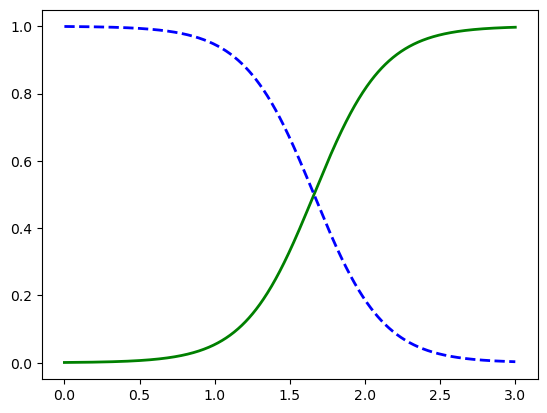

In [44]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

c:\Users\patrick\miniconda3\envs\tf2\lib\site-packages\matplotlib\patches.py:1390: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


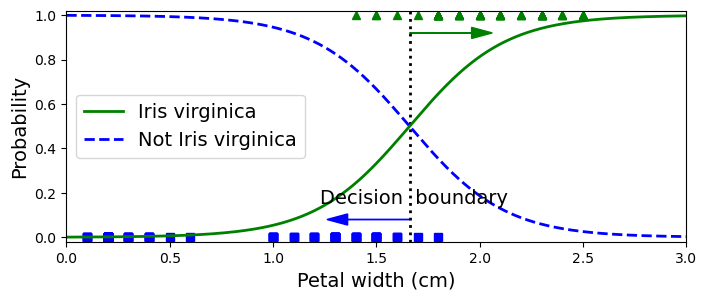

In [46]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

In [47]:
decision_boundary

array([1.66066066])

In [48]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

Just like the other linear models, Logistic Regression models can be regularized using $l_1$ or $l_2$ penalties. Scikit-Learn actually adds an $l_2$ penalty by default.

Note: The hyperparameter controlling the regularization strength of a Scikit-Learn LogisticRegression model is not alpha (as in other linear models), but its inverse: C. The higher the value of C, the less the model is regularized.

#### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

The idea is quite simple: when given an instance $\mathbf{x}$, the Softmax Regression model first computes a score $s_k(\mathbf{x})$ for each class $k$, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(\mathbf{x})$ should look familiar, as it is just like the equation for Linear Regression prediction.

Softmax Regression score for class k:

$$s_k(\mathbf{x}) = \mathbf{x}^T\cdot\mathbf{\theta}^{(k)}$$

Softmax function:

$$\hat{p}_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^K \exp(s_j(\mathbf{x}))}$$

In this equation:
- $K$ is the number of classes
- $\mathbf{s}(\mathbf{x})$ is a vector containing the scores of each class for the instance $\mathbf{x}$.
- $\sigma(\mathbf{s}(\mathbf{x}))_k$ is the estimated probability that the instance $\mathbf{x}$ belongs to class $k$, given the scores of each class for that instance.

Softmax Regression classifier prediction:

$$\hat{y} = \arg\max_k \sigma(\mathbf{s}(\mathbf{x}))_k = \arg\max_k s_k(\mathbf{x}) = \arg\max_k(\mathbf{x}^T\cdot\mathbf{\theta}^{(k)})$$

The argmax operator returns the value of $k$ that maximizes the following function.

Cross entropy cost function:

$$J(\mathbf{\Theta}) = -\frac{1}{m}\sum_{i=1}^m \sum_{k=1}^K y_k^{(i)}\log(\hat{p}_k^{(i)})$$

In this equation:
- $y_k^{(i)}$ is the target probability for the $k^{th}$ class for the $i^{th}$ instance (equal to 1 if the target class for this instance is $k$, or 0 otherwise).

Cross entropy gradient vector for class k:

$$\nabla_{\mathbf{\theta}^{(k)}}J(\mathbf{\Theta}) = \frac{1}{m}\sum_{i=1}^m(\hat{p}_k^{(i)} - y_k^{(i)})\mathbf{x}^{(i)}$$

In [49]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

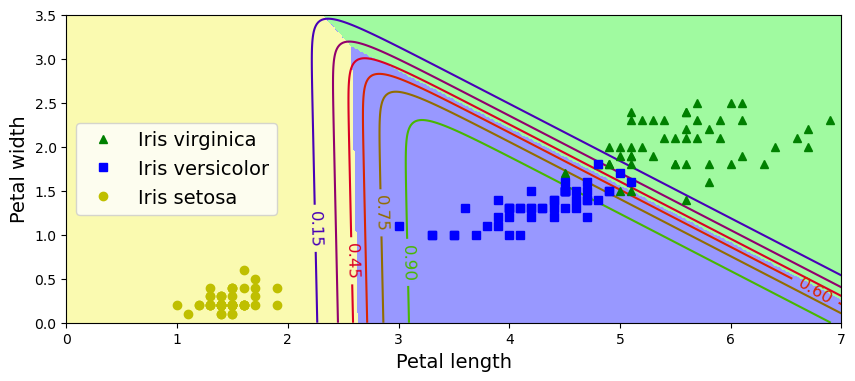

In [51]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()